# SERVO PREDICTION

**About Data set**

Predictive Modeling of Servo Behavior using Linear Regression: Enhancing Control Systems Through Data-Driven Insights.

**What is servo** - In contral engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:

1. Motor A,B,C,D,E

2. Screw A,B,C,D,E

3. Pgain 3,4,5,6

4. Vgain 1,2,3,4,5

5. Class 0.13 to 7.10

# Importing Libraries

In [4]:
import pandas as pd

In [5]:
import numpy as np

# Importing Data

In [6]:
servo_mech = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

# Getting First 5 Rows of Data

In [7]:
servo_mech.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# Getting Information of Data Frame

In [8]:
servo_mech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# Describing Data

In [9]:
servo_mech.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# Getting Column names

In [10]:
servo_mech.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# Getting Shape of Data Frame

In [11]:
servo_mech.shape

(167, 5)

# Getting Categories and Counts of Categorical variables

In [12]:
servo_mech[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [13]:
servo_mech[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

# Getting Encoding of Categorical Features

In [14]:
servo_mech.replace({'Motor':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}},inplace=True)

In [15]:
servo_mech.replace({'Screw':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}},inplace=True)

# Defining y(target variable) and X (Features or independent variable)

In [16]:
y = servo_mech['Class']

In [17]:
y.shape

(167,)

In [18]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [19]:
X = servo_mech[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [20]:
X.shape

(167, 4)

In [21]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# Getting Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=2529)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 4), (117, 4), (50,), (117,))

# Getting Model Train

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin_reg = LinearRegression()

In [27]:
lin_reg.fit(X_train,y_train)

LinearRegression()

# Getting Model Prediction

In [28]:
y_pred = lin_reg.predict(X_test)

In [29]:
y_pred.shape

(117,)

In [30]:
y_pred

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

# Getting Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
mean_squared_error(y_test, y_pred)

73.57022323365531

In [33]:
mean_absolute_error(y_test, y_pred)

7.158141394974153

In [34]:
r2_score(y_test, y_pred)

0.6372902527668625

# Getting Visualization of Actual vs Predicted Results

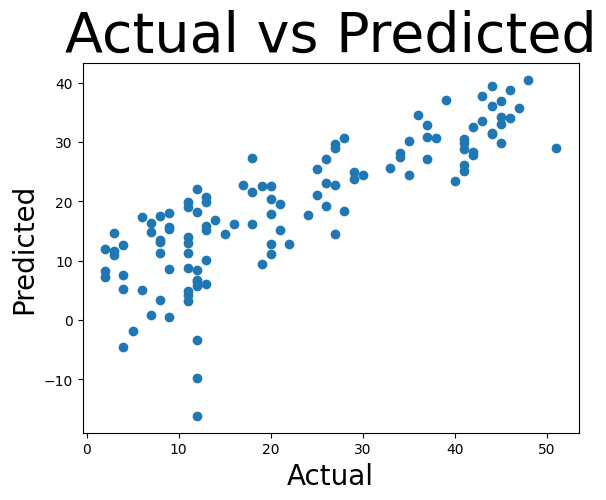

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual", size=20)
plt.ylabel("Predicted", size=20)
plt.title("Actual vs Predicted", size=40)
plt.show()

# Getting Future Predictions

**Select a random sample from existing dataset as new value**
1. Extract a random row using sample function
2. Separate X and y
3. Standardize X
4. Predict

In [36]:
X_new = servo_mech.sample(1)

In [37]:
X_new

,Motor,Screw,Pgain,Vgain,Class
51,2,1,3,2,44


In [38]:
X_new.shape

(1, 5)

In [39]:
X_new = X_new.drop('Class', axis = 1)

In [40]:
X_new

,Motor,Screw,Pgain,Vgain
51,2,1,3,2


In [41]:
X_new.shape

(1, 4)

In [42]:
y_pred_new = lin_reg.predict(X_new)

In [43]:
y_pred_new

array([36.16014022])